In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.444
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,80.769
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.696
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,50.000
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,50.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020-11-24T17:00:00,8,Emilia-Romagna,2723,243,2966,68378,71344,1964,2501,...,55.0,19602.0,7671.0,1984.0,8.19,4.16,12.76,32.60,-2.02,3.605
274,2020-11-25T17:00:00,8,Emilia-Romagna,2763,249,3012,69514,72526,1182,2130,...,54.0,18498.0,7342.0,1136.0,8.27,4.15,11.51,29.01,2.47,2.986
275,2020-11-26T17:00:00,8,Emilia-Romagna,2679,258,2937,68535,71472,-1054,2157,...,55.0,17264.0,6319.0,-979.0,8.78,4.11,12.49,34.14,3.61,2.974
276,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,3.029


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2172
Nuovi tamponi: 17241.0
Percentuale nuovi positivi/nuovi tamponi: 13.0 %
Nuovi guariti: 2601.0
Nuovi deceduti: 70.0
Variazione positivi ricoverati con sintomi: 0.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: -501.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-29T17:00:00,8,Emilia-Romagna,204,14,218,4492,4710,25,97,...,2.0,10580.0,4571.0,23.0,6.42,4.63,0.92,2.12,-6.67,2.070
1,2020-09-30T17:00:00,8,Emilia-Romagna,205,14,219,4434,4653,-57,101,...,0.0,9938.0,4312.0,-58.0,6.39,4.71,1.02,2.34,0.00,2.144
2,2020-10-01T17:00:00,8,Emilia-Romagna,206,14,220,4434,4654,1,103,...,0.0,8418.0,3281.0,0.0,6.36,4.73,1.22,3.14,0.00,2.214
3,2020-10-02T17:00:00,8,Emilia-Romagna,201,11,212,4465,4677,23,163,...,0.0,13054.0,6348.0,31.0,5.19,4.53,1.25,2.57,-21.43,3.502
4,2020-10-03T17:00:00,8,Emilia-Romagna,200,11,211,4579,4790,113,167,...,1.0,9867.0,3628.0,114.0,5.21,4.41,1.69,4.60,0.00,3.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-24T17:00:00,8,Emilia-Romagna,2723,243,2966,68378,71344,1964,2501,...,55.0,19602.0,7671.0,1984.0,8.19,4.16,12.76,32.60,-2.02,3.605
57,2020-11-25T17:00:00,8,Emilia-Romagna,2763,249,3012,69514,72526,1182,2130,...,54.0,18498.0,7342.0,1136.0,8.27,4.15,11.51,29.01,2.47,2.986
58,2020-11-26T17:00:00,8,Emilia-Romagna,2679,258,2937,68535,71472,-1054,2157,...,55.0,17264.0,6319.0,-979.0,8.78,4.11,12.49,34.14,3.61,2.974
59,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,3.029


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

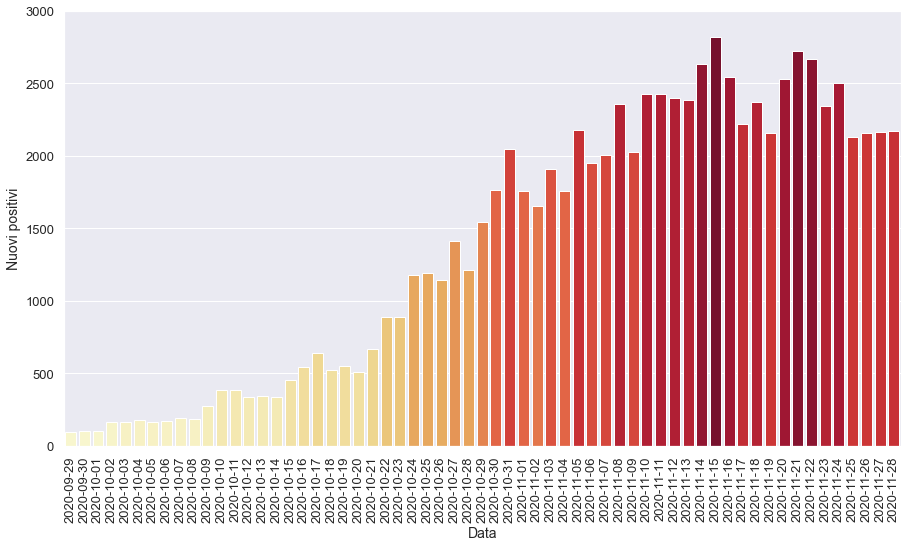

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

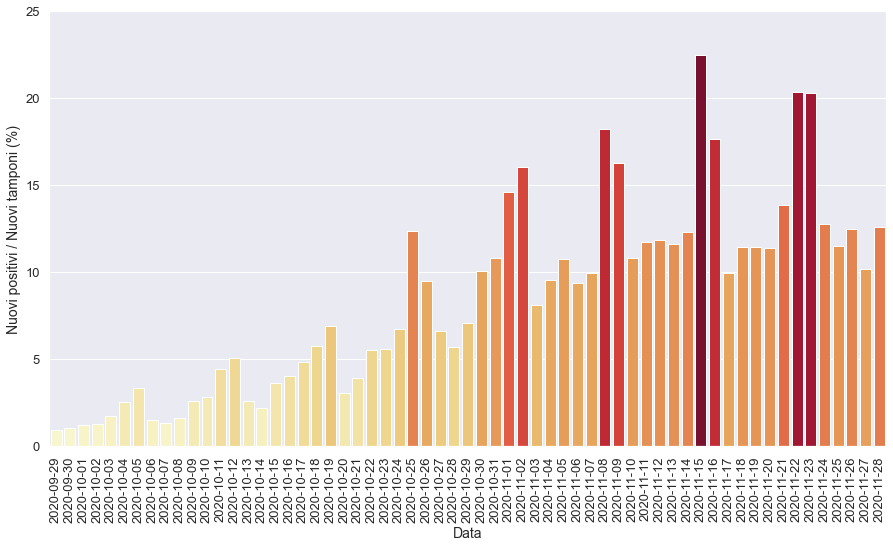

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

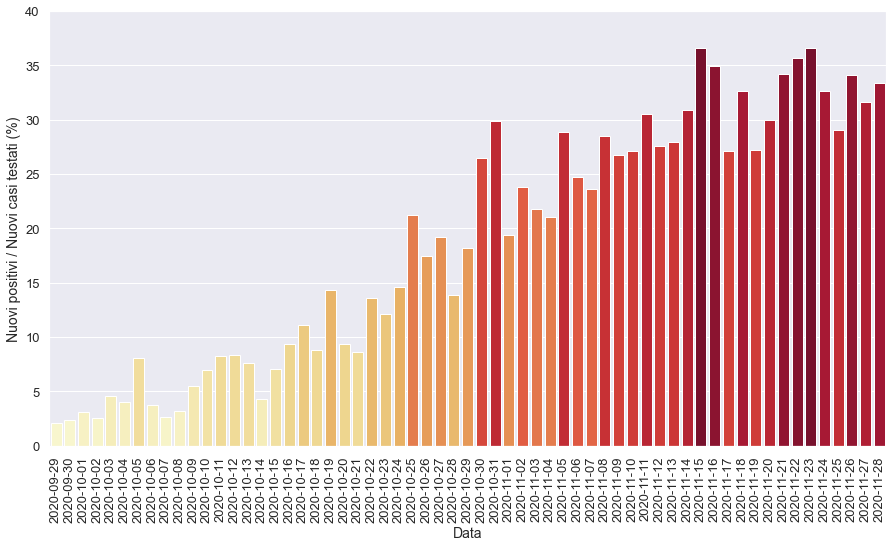

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

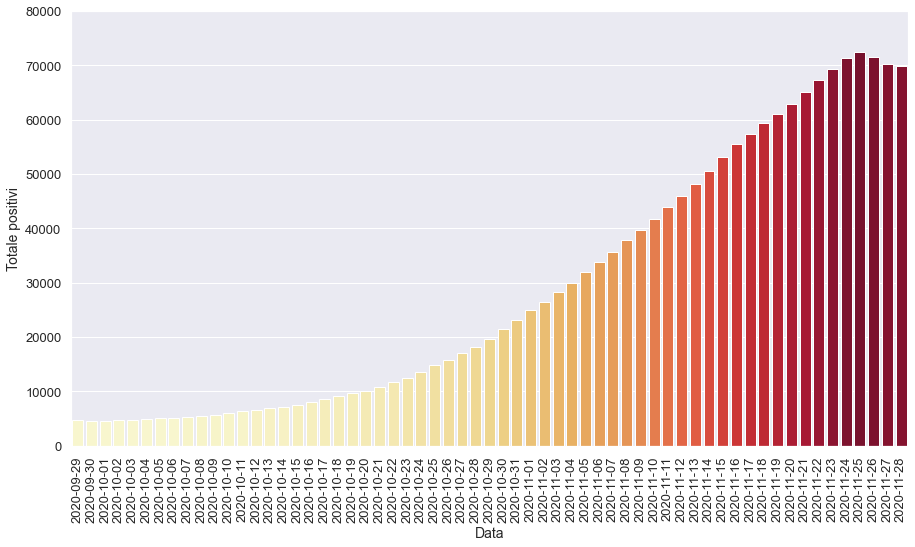

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

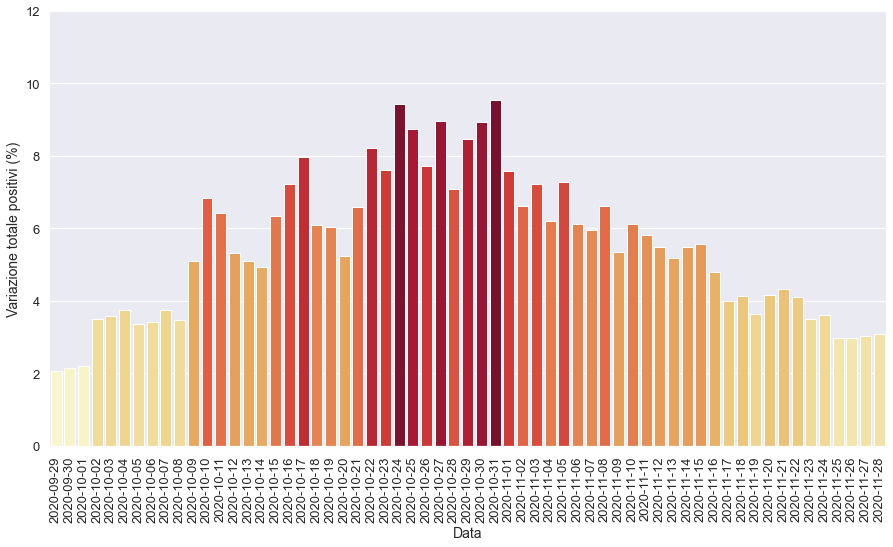

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

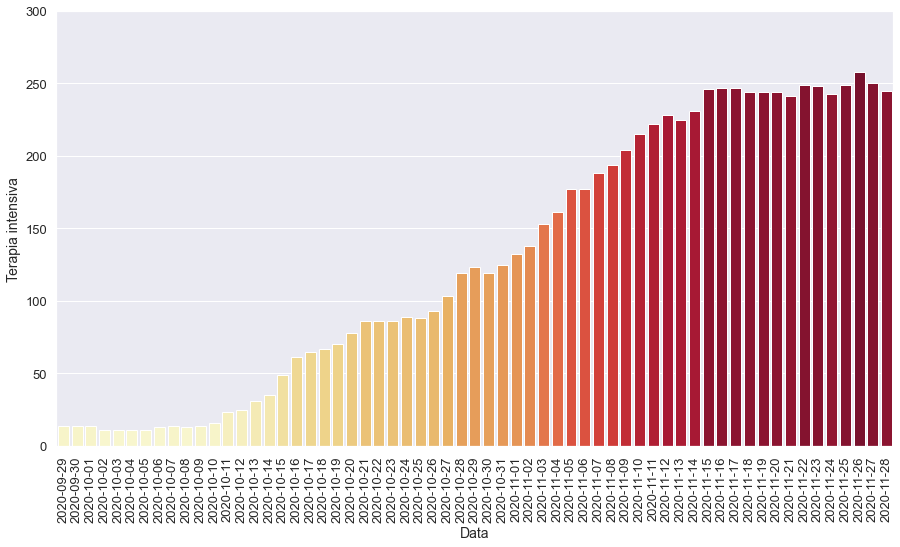

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

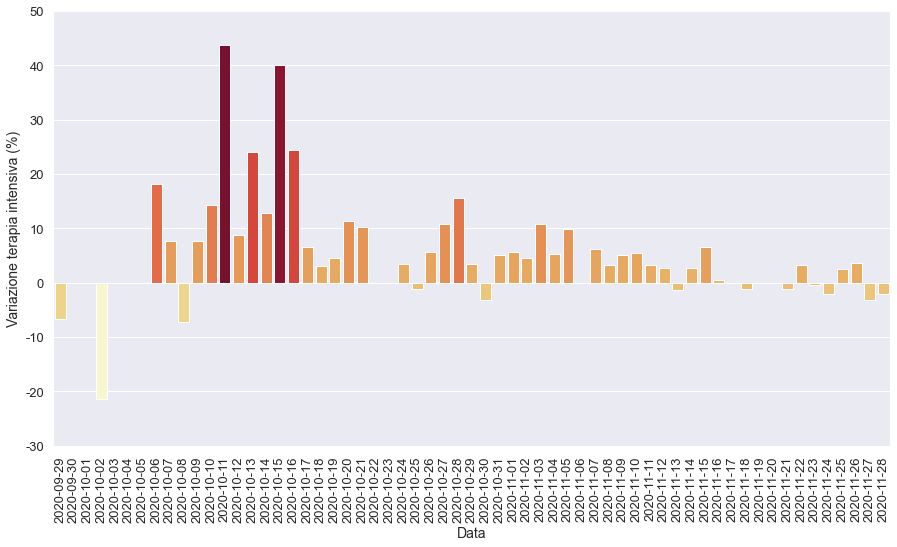

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

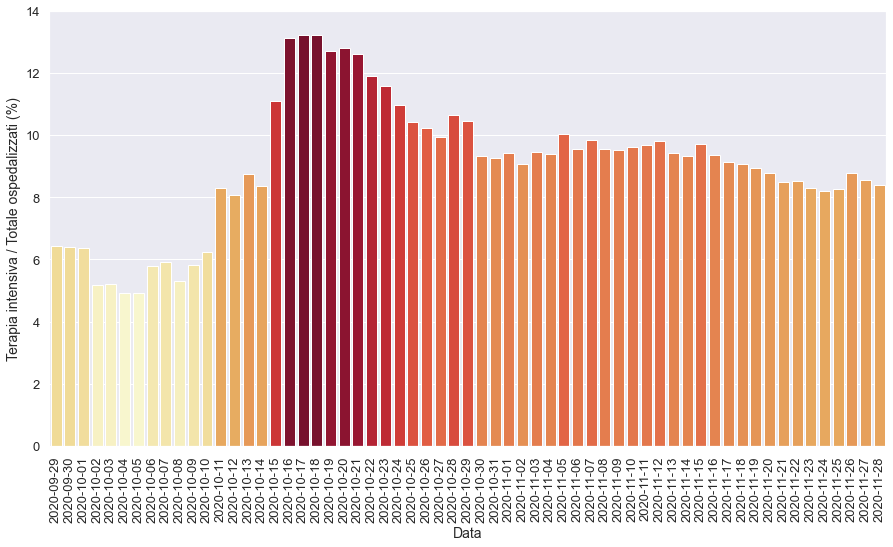

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

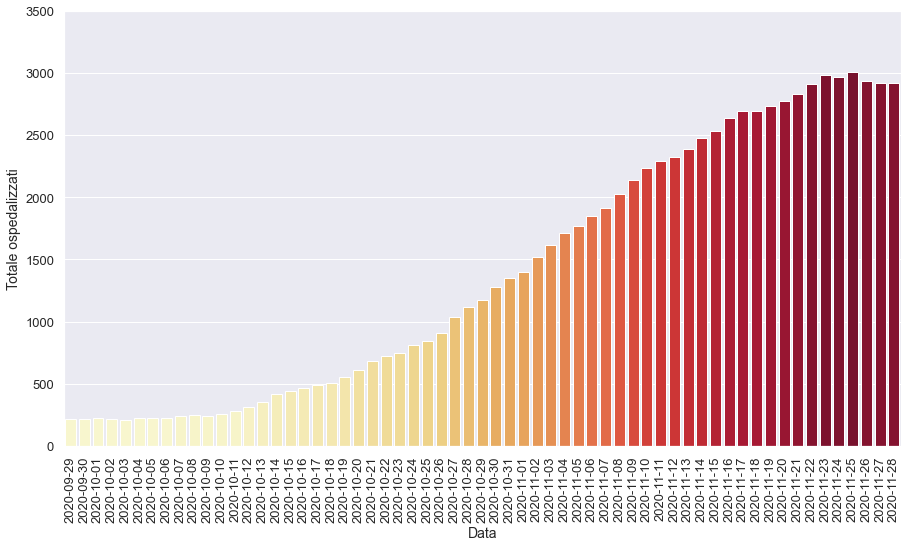

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

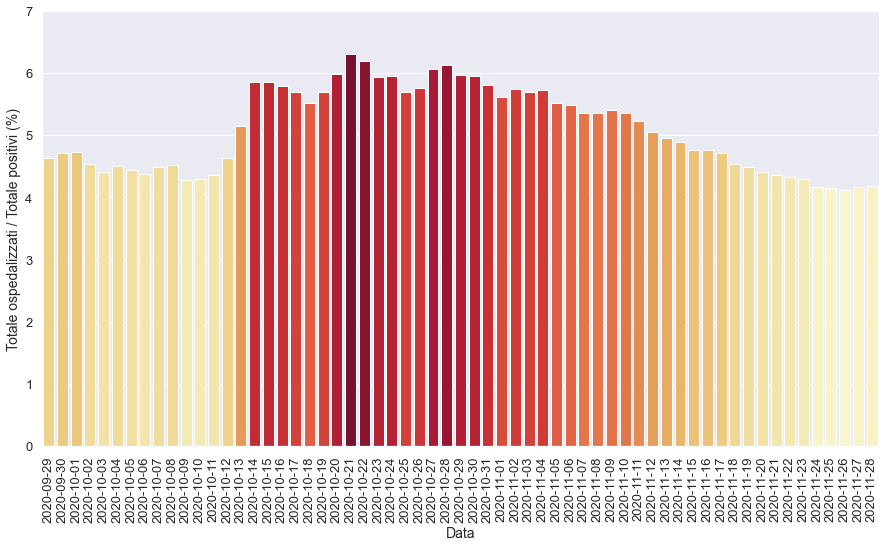

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

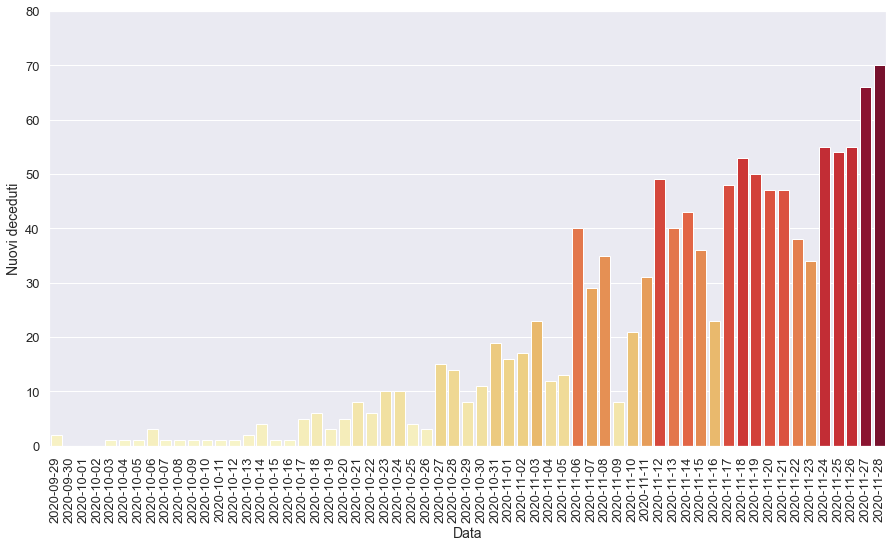

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

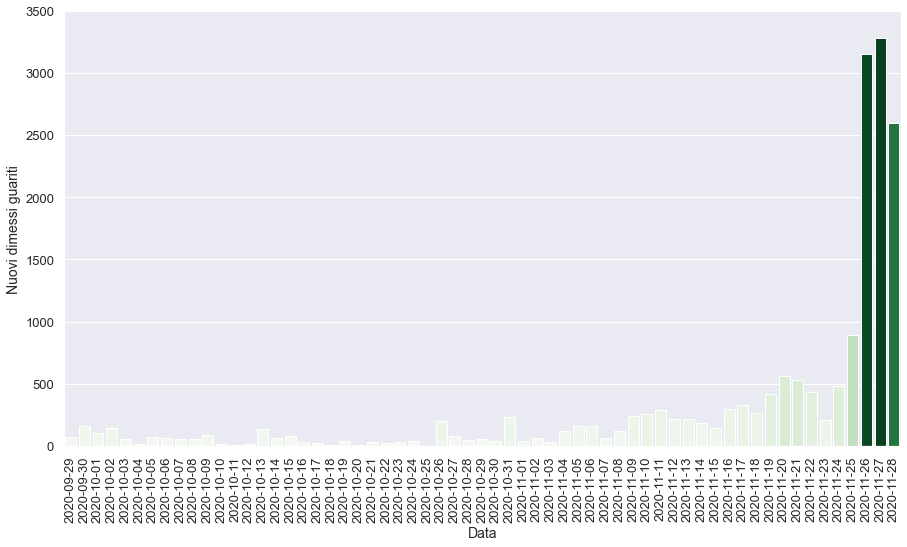

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-29T17:00:00,8,Emilia-Romagna,1054,123,1177,18536,19713,1483,1545,...,8.0,21860.0,8476.0,1424.0,10.45,5.97,7.07,18.23,3.36,8.476
1,2020-10-30T17:00:00,8,Emilia-Romagna,1157,119,1276,20145,21421,1708,1763,...,11.0,17577.0,6653.0,1609.0,9.33,5.96,10.03,26.50,-3.25,8.945
2,2020-10-31T17:00:00,8,Emilia-Romagna,1223,125,1348,21865,23213,1792,2046,...,19.0,18943.0,6852.0,1720.0,9.27,5.81,10.80,29.86,5.04,9.552
3,2020-11-01T17:00:00,8,Emilia-Romagna,1267,132,1399,23518,24917,1704,1758,...,16.0,12039.0,9050.0,1653.0,9.44,5.61,14.60,19.43,5.60,7.574
4,2020-11-02T17:00:00,8,Emilia-Romagna,1382,138,1520,24972,26492,1575,1652,...,17.0,10299.0,6942.0,1454.0,9.08,5.74,16.04,23.80,4.55,6.630
5,2020-11-03T17:00:00,8,Emilia-Romagna,1464,153,1617,26731,28348,1856,1912,...,23.0,23700.0,8793.0,1759.0,9.46,5.70,8.07,21.74,10.87,7.218
6,2020-11-04T17:00:00,8,Emilia-Romagna,1554,161,1715,28259,29974,1626,1758,...,12.0,18401.0,8354.0,1528.0,9.39,5.72,9.55,21.04,5.23,6.202
7,2020-11-05T17:00:00,8,Emilia-Romagna,1588,177,1765,30211,31976,2002,2180,...,13.0,20332.0,7558.0,1952.0,10.03,5.52,10.72,28.84,9.94,7.274
8,2020-11-06T17:00:00,8,Emilia-Romagna,1673,177,1850,31880,33730,1754,1953,...,40.0,20847.0,7906.0,1669.0,9.57,5.48,9.37,24.70,0.00,6.108
9,2020-11-07T17:00:00,8,Emilia-Romagna,1723,188,1911,33738,35649,1919,2009,...,29.0,20218.0,8497.0,1858.0,9.84,5.36,9.94,23.64,6.21,5.956


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

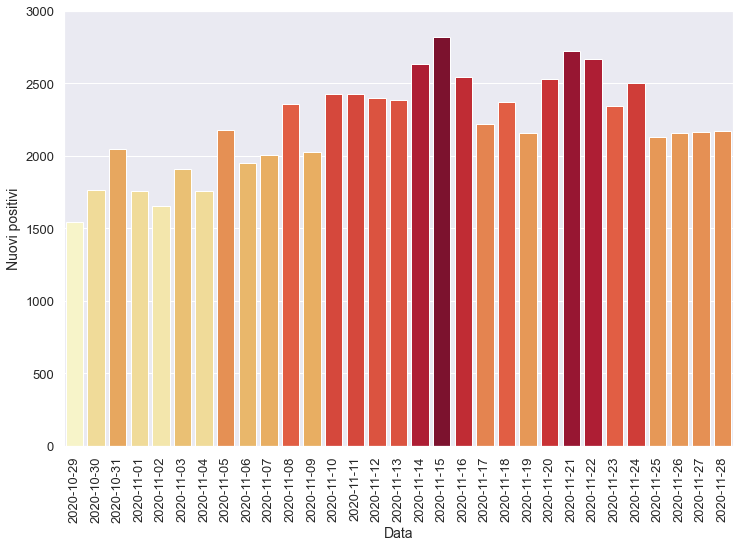

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

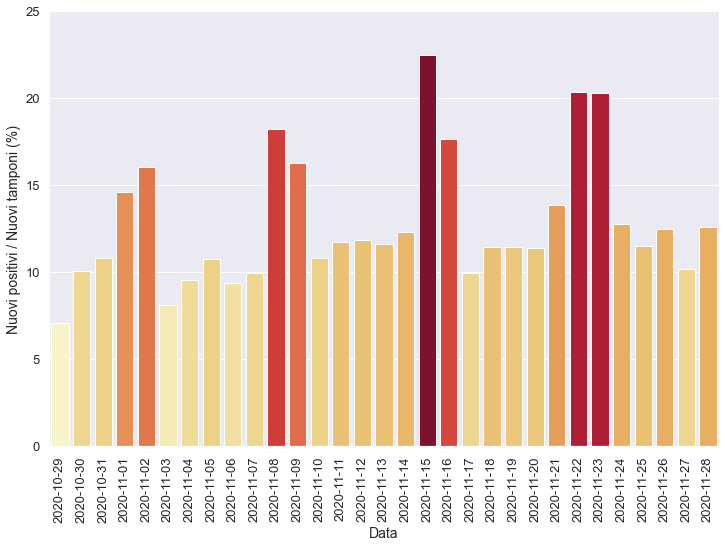

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

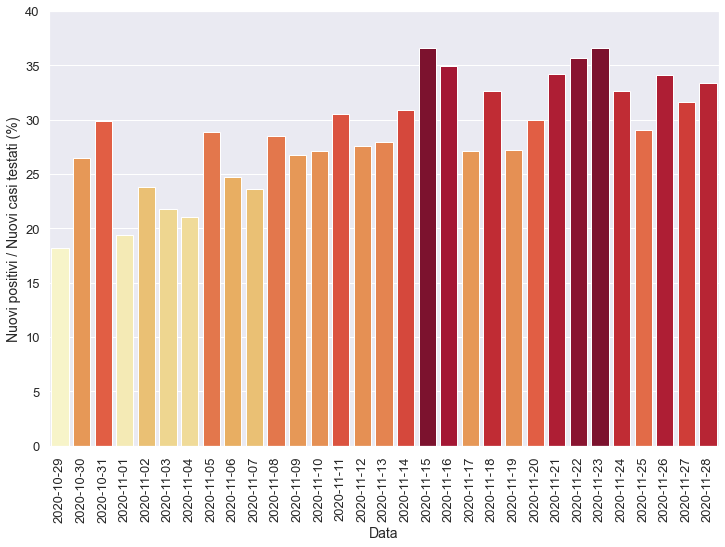

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

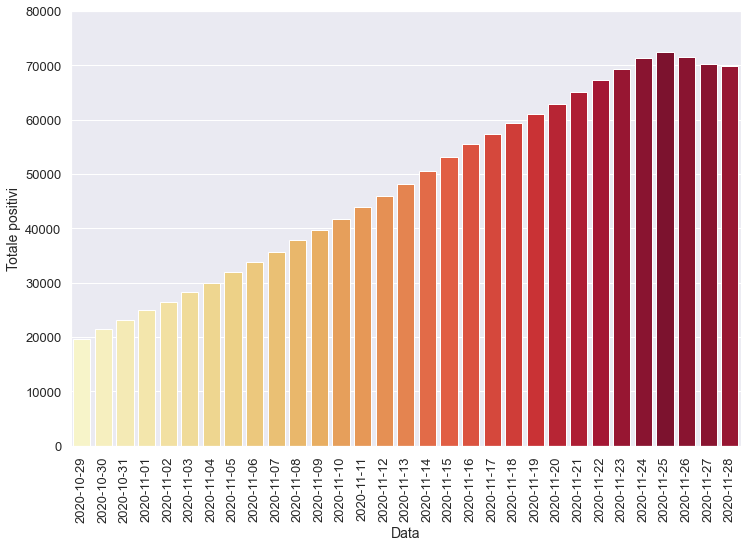

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

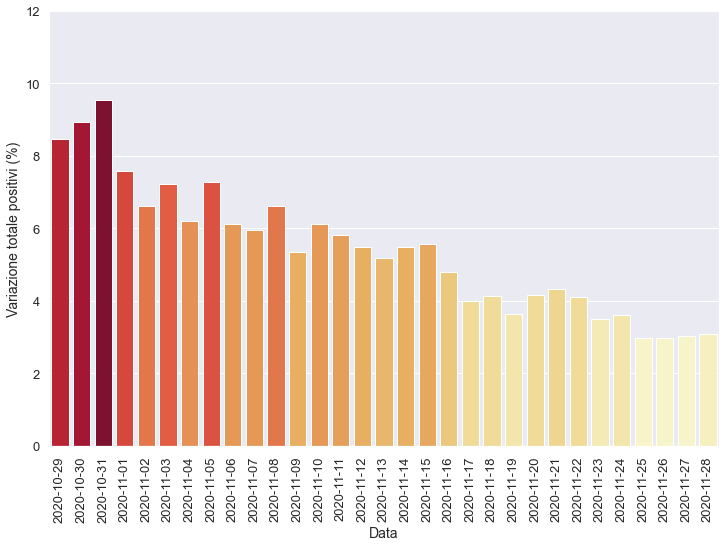

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

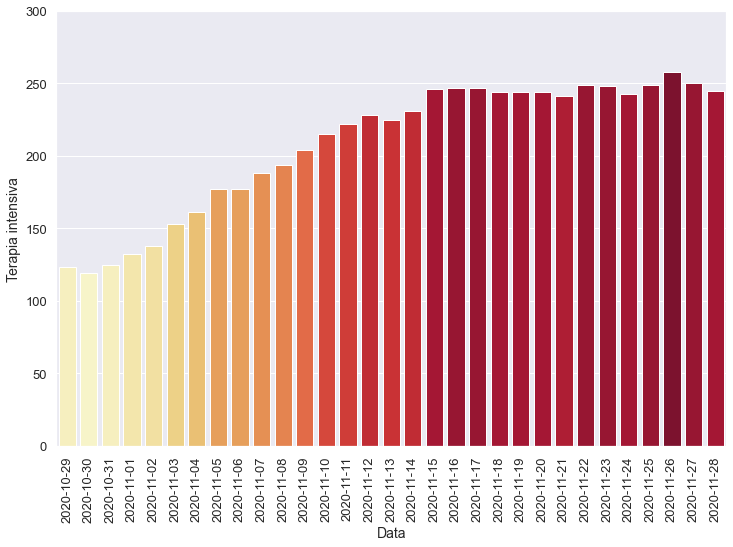

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

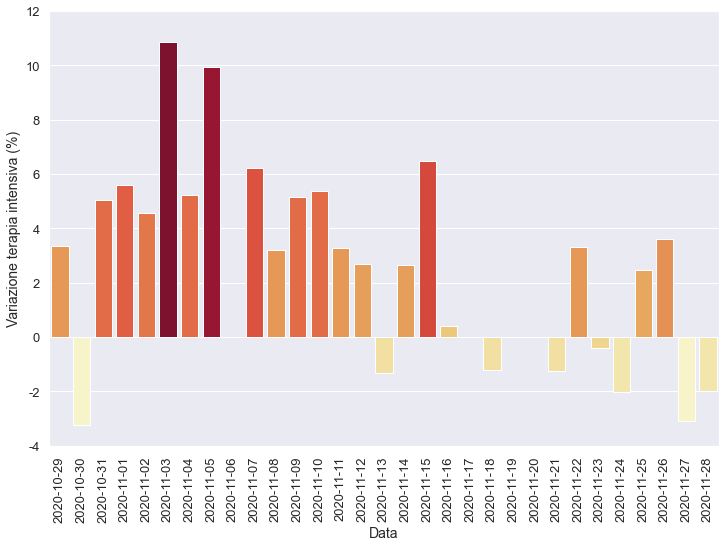

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

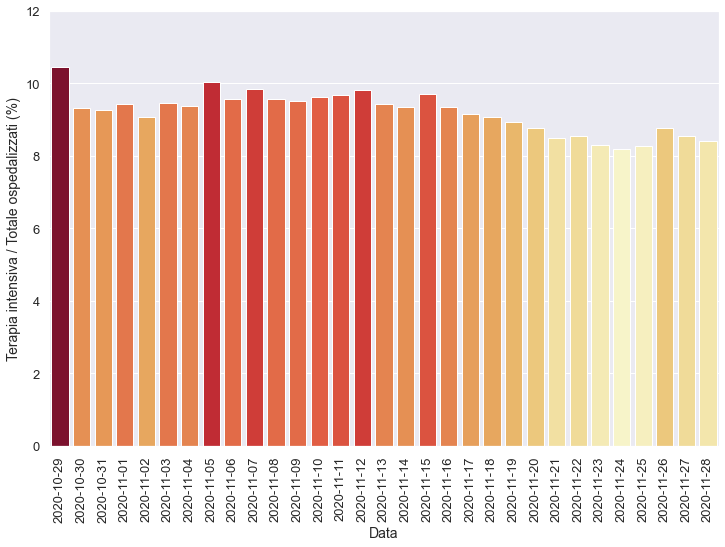

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

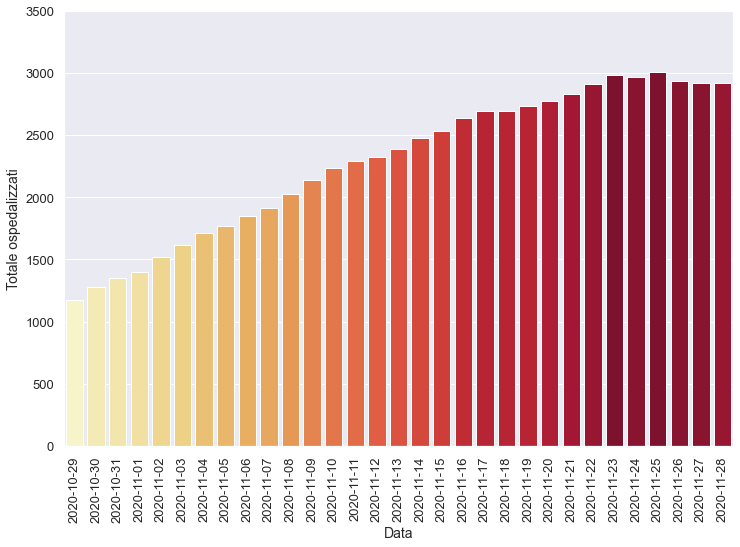

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

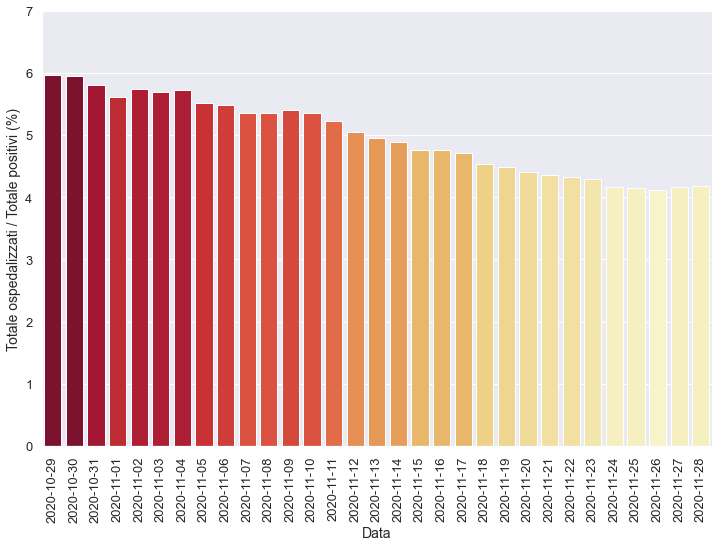

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

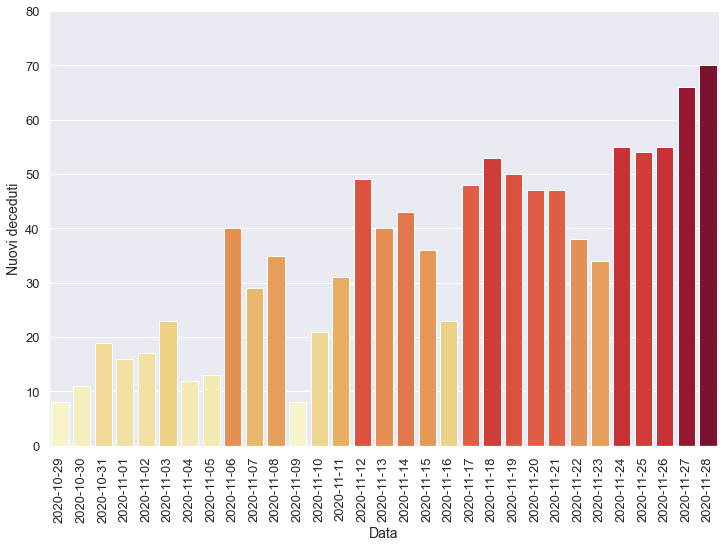

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

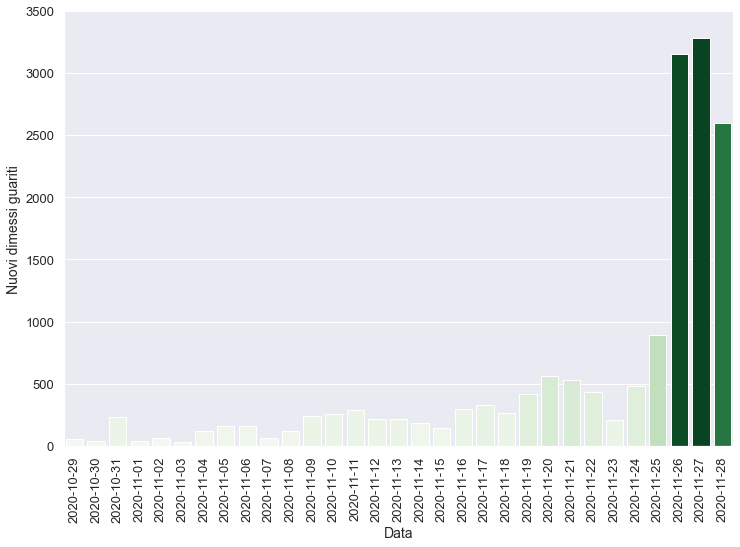

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-21T17:00:00,8,Emilia-Romagna,2594,241,2835,62245,65080,2146,2723,...,47.0,19697.0,7971.0,2089.0,8.50,4.36,13.82,34.16,-1.23,4.327
1,2020-11-22T17:00:00,8,Emilia-Romagna,2666,249,2915,64359,67274,2194,2665,...,38.0,13114.0,7468.0,2114.0,8.54,4.33,20.32,35.69,3.32,4.095
2,2020-11-23T17:00:00,8,Emilia-Romagna,2738,248,2986,66394,69380,2106,2347,...,34.0,11558.0,6417.0,2035.0,8.31,4.30,20.31,36.57,-0.40,3.489
3,2020-11-24T17:00:00,8,Emilia-Romagna,2723,243,2966,68378,71344,1964,2501,...,55.0,19602.0,7671.0,1984.0,8.19,4.16,12.76,32.60,-2.02,3.605
4,2020-11-25T17:00:00,8,Emilia-Romagna,2763,249,3012,69514,72526,1182,2130,...,54.0,18498.0,7342.0,1136.0,8.27,4.15,11.51,29.01,2.47,2.986
5,2020-11-26T17:00:00,8,Emilia-Romagna,2679,258,2937,68535,71472,-1054,2157,...,55.0,17264.0,6319.0,-979.0,8.78,4.11,12.49,34.14,3.61,2.974
6,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,3.029
7,2020-11-28T17:00:00,8,Emilia-Romagna,2673,245,2918,66865,69783,-506,2172,...,70.0,17241.0,6512.0,-501.0,8.40,4.18,12.60,33.35,-2.00,3.090


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

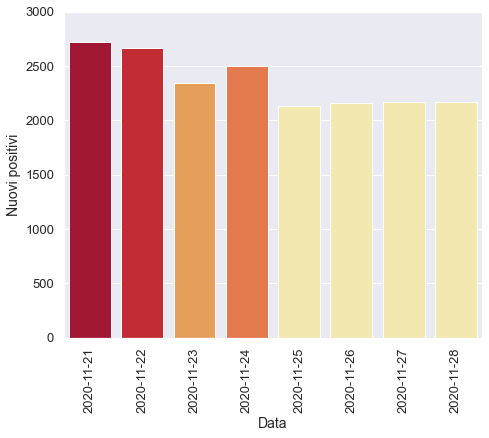

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

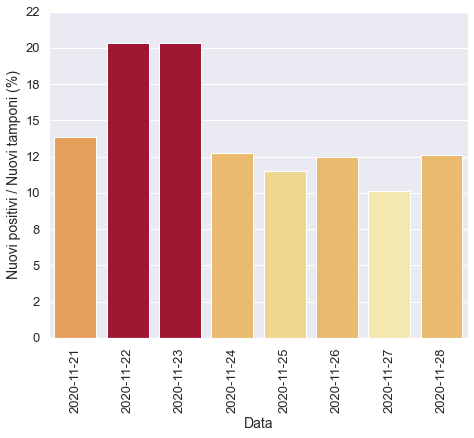

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

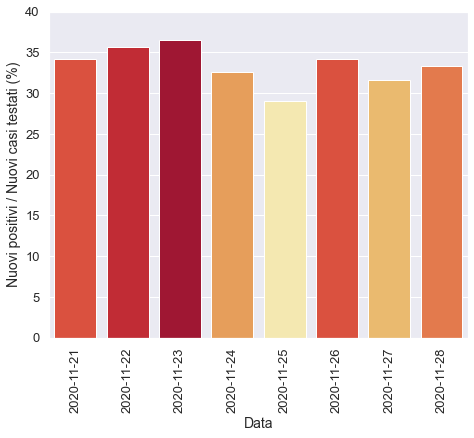

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

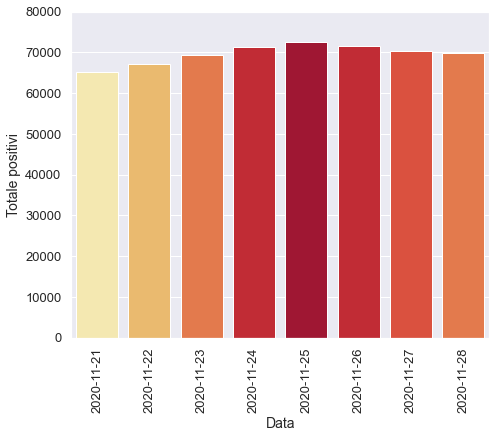

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

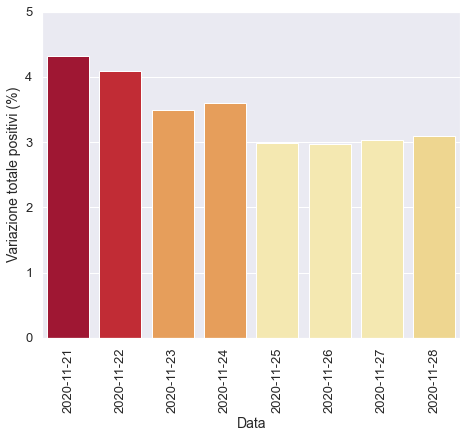

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

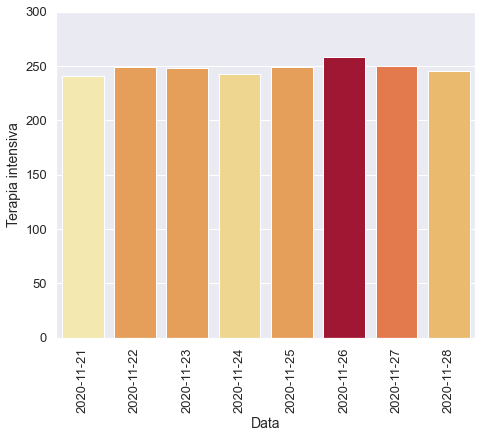

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

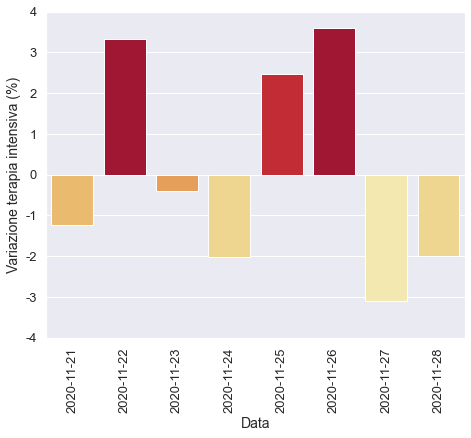

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

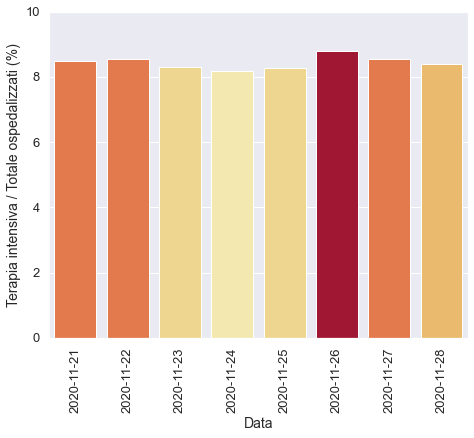

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

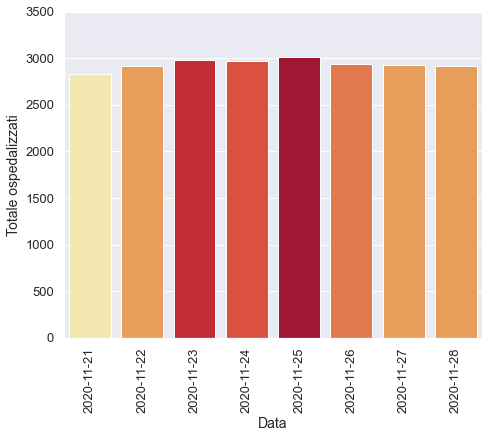

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

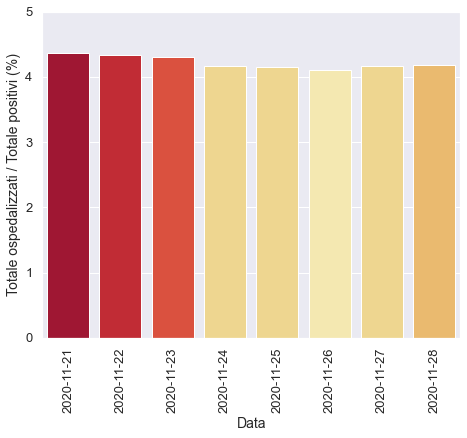

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

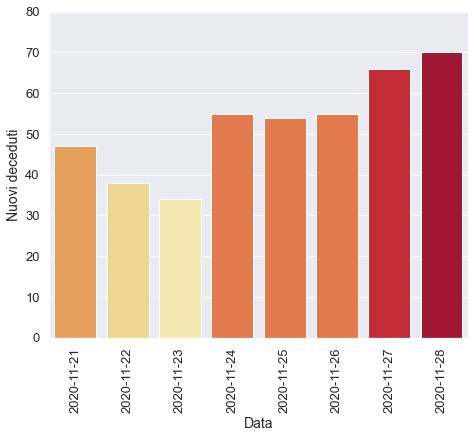

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

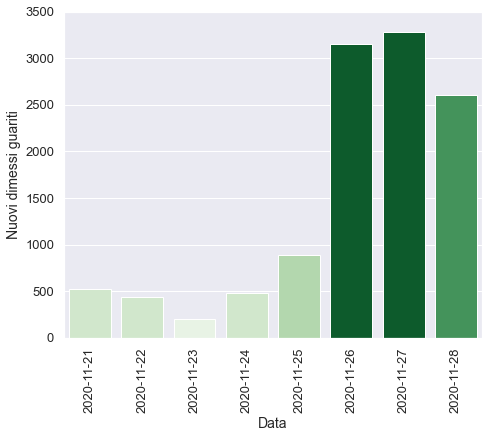

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)